# Discrete Probability Distributions

In the [previous Series](https://github.com/boris-dee/understanding_series/blob/master/probabilities/01.discrete_random_variables.ipynb), we introduced the concept of discrete random variables and we talked about lookup tables, where all $(x_i, p_i)$ pairs are gathered. A question you may ask yourself is "How do I fill this table? How do I calculate the probability $p_i$ that $X$ is equal to $x_i$?".

Well what you need is a **probability distribution**. As its name suggests, it's a mathematical function that provides the distribution of probabilities, that is, the probabilities of occurrence of all possible outcomes in a random experiment. In the case of the dice throws, we said that the probability of having each face is $1/6$ without much justification, but it is actually because the random variable follows a discrete uniform distribution. Knowing that, we can then determine the probability of obtaining each face.

It can be difficult, however, to find the correct probability distribution. In this Series we take a quick look at three of the most frequently used: the discrete uniform, binomial, and Poisson distributions.

## 0. Prerequisites to this Series
- [Discrete Random Variables](https://github.com/boris-dee/understanding_series/blob/master/probabilities/01.discrete_random_variables.ipynb)

- Combinatorics (optional)

- Taylor Series (optional)

## 1. Discrete uniform distribution
### 1.1. Definition and properties

> **The discrete uniform distribution is a probability distribution in which a finite number of values are equally likely to be observed**.

The typical example of a random variable that follows such a distribution is the throwing of a dice. The possible values are in the $[1 ; 6]$ interval and each time the dice is thrown, the probability of a given score is $1/6$.


Let $X$ be a random variable that can take $n$ integer values between $a$ and $b$, with each outcome equally likely to be observed.
>**Properties:**
>
> - **Notation: $X\sim\mathcal{U}\{a;b\}$.** It reads "$X$ follows a uniform distribution".
> - **Probability: $~\forall i\in\mathbb{N}, \quad P(X=x_i)=\dfrac{1}{n}$.**
> - **Theoretical expected value: $E(X)=\dfrac{a+b}{2}$.**
> - **Theoretical variance: $V(X)=\dfrac{(b-a+1)^2-1}{12}$.**

### 1.2. Example: Throwing a dice
Let's apply the formulae above to the throwing of a fair dice. Let $X$ be the result of the dice throw. It can take all integer values between $a=1$ and $b=6$, hence $n=6$ possible outcomes.
> - Notation: $X\sim\mathcal{U}\{1;6\}$.
> - Probability: $P(X=1)=P(X=2)=\ldots=P(X=6)=\dfrac{1}{6}$.
> - Theoretical expected value: $E(X)=\dfrac{7}{2}=3.5$.
> - Theoretical variance: $V(X)=\dfrac{35}{12}=2.92$.

At the end of the previous Series, we threw a dice 20 times and we found that the measured expected value and variance was $3.50$ and $3.14$, respectively. 

Let's redo these calculations with different counts of dice throws:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

nthrows = [10, 20, 50, 100, 500, 1000, 5000, 10000, 50000]
means = []
variances = []

for throw in nthrows:
    X = np.random.randint(1, 7, throw)
    
    print('%5i throws: the mean is %0.2f and the variance is %0.2f.' 
          %(throw, X.mean(), X.std()**2))
    
    # Store the results for future plotting
    means.append(X.mean())
    variances.append(X.std()**2)

   10 throws: the mean is 3.30 and the variance is 2.21.
   20 throws: the mean is 4.10 and the variance is 3.09.
   50 throws: the mean is 3.38 and the variance is 2.24.
  100 throws: the mean is 3.36 and the variance is 2.97.
  500 throws: the mean is 3.51 and the variance is 2.79.
 1000 throws: the mean is 3.47 and the variance is 2.96.
 5000 throws: the mean is 3.51 and the variance is 2.95.
10000 throws: the mean is 3.51 and the variance is 2.93.
50000 throws: the mean is 3.50 and the variance is 2.94.


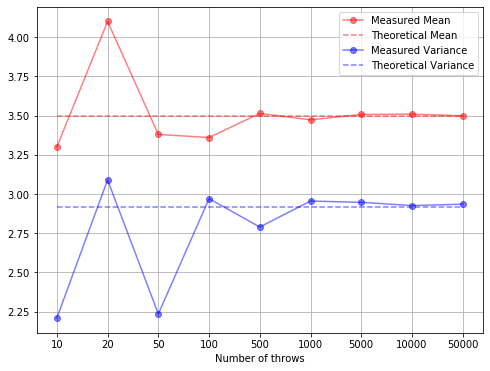

In [2]:
# Plot
fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(111)
ax1.plot(means, 'ro-', alpha=0.5, label='Measured Mean')
ax1.plot([0,8],[3.5,3.5], '--', color='red', alpha=0.5, label='Theoretical Mean')
ax1.plot(variances, 'bo-', alpha=0.5, label='Measured Variance')
ax1.plot([0,8],[2.92,2.92], '--', color='blue', alpha=0.5, label='Theoretical Variance')
ax1.set_xticklabels([0, 10, 20, 50, 100, 500, 1000, 5000, 10000, 50000])
ax1.set_xlabel('Number of throws')
ax1.grid()
ax1.legend()

plt.show()

In the plot above, we see that the higher the number of dice throws, the closer the measured mean and variance get to their theoretical counterparts: **the theoretical quantities are mathematical limits when the number of experiments tends to infinity**.

# 2. Binomial distribution
The most important thing to understand with the binomial distribution is that **it only applies to random variables that have exactly two outcomes**. For instance:
- Presence or absence of a disease.
- Coin toss (to a witcher 🎶 ... oh valley of plenty 🎵)
- Test result: positive or negative.
- Gender detection: male or female.
- etc.

Note that even when a random variable has more than two outcomes, it is possible to tackle the problem with a binomial distribution by setting a **threshold** and considering that the variable has only two outcomes: above or below the threshold.

## 2.1. Bernoulli random variable
Let $X$ be a discrete random variable with only two possible outcomes, say $X=0$ and $X=1$. By convention, we define the probabilities of having $X=1$ and $X=0$ as $p$ and $q$, respectively. Since there are only two possible outcomes, we have $q=1-p$.

>**The random variable $X$ is called a Bernoulli variable. It has the following properties:**
>
>- **Notation: $X\sim\mathcal{B}(p)$**.
>- **Probability: $P(X=1)=p$ and $P(X=0)=q$**.
>- **Theoretical expected value: $E(X)=p$**.
>- **Theoretical variance: $V(X)=p\times q=p(1-p)$**.

For example, the result of a single toin coss is a Bernoulli variable. If the coin is fair, there's a 50% chance of having heads ($X=0$) or tails ($X=1$), so that $p=q=0.5$. The theoretical expected value is $E(X)=0.5$, meaning that if we toss a lot of coins, we expect an average result of $0.5$. Of course we never obtain this value (cf. [this Series](https://github.com/boris-dee/understanding_series/blob/master/probabilities/01.discrete_random_variables.ipynb)), but we oscillate around it.

## 2.2. Binomial distribution
### 2.2.1. Definition and properties
The binomial distribution is very easy to understand. Suppose we have a Bernoulli variable $X$ and we are performing $N$ random experiments, for example:
- Tossing $100$ coins. $X$ is a single result. Possible outcomes: heads or tails.
- Performing $500$ screening tests. $X$ is a single test result. Possible outcomes: positive or negative.
- Asking $1000$ people whether they like unicorns. $X$ is a single answer. Possible outcomes: yes or no.

> **In all of the above cases, the variable $X$ follows a binomial distribution, with the following properties:**
>
>- **Notation: $X\sim\mathcal{B}(N,p)$**. $N$ is the number of experiments. $p$ is the probability of having $X=1$.
>- **Probability: see section 2.2.3.**.
>- **Theoretical expected value: $E(X)=Np$**.
>- **Theoretical variance: $V(X)=Npq=Np(1-p)$**.

### 2.2.2. Example: Myopia
Imagine a brilliant white light above y... errrr no, imagine we have a thousand people and we ask ourselves: "How many of them are shortsighted?". The answer to this question can be found by asking every single person whether they are shortsighted. **So the random experiment is "Ask one person whether they are shortsighted"**. It is random because we *a priori* do not know the answer to this question. The random variable is the answer to this question. It has two possible outcomes: yes or no. **So $X$ is a Bernoulli variable, and the number of experiments is $N=1000$: $X\sim\mathcal{B}(1000,p)$**. 

In order to calculate the theoretical expected value, we need the probability $p$ that a person is shortsighted $(X=1)$. We can find it on the Internet. In France, it's approximately 40%, so we set $p=0.40$. Of course this is not the exact theoretical value. It's rather a measured value, but because it has been measured on a very large amount of people (millions of them), we can make the assumption that this measured value is very close to the true theoretical value.

With these data, the theoretical expected value is: $E(X)=Np=1000\times 0.40=400$. This result means that if we have a group of a thousand people and that we are interested in myopia, then **we expect that 400 of them are shortsighted**. If we then actually count the number of shortsighted people in our group, we'll probably find a number that is different from 400, but that's OK, that's once again the difference between a true theoretical value and a measured one.

### 2.2.3. Calculating probabilities with the binomial distribution.
This section is a bit more complicated. It details the derivation of the probability formula for the binomial distribution.

But first of all, what kind of probability can we calculate with the binomial distribution?

Indeed, the random variable of a binomial distribution has only two possible outcomes: 0 and 1, with respective probabilities $p$ and $q$. So you might ask yourself "Well there go our probabilities, why would we need another formula?".

There's actually something else that you can calculate: it is the probability of having $X=1$ exactly $m$ times out of $N$ experiments. That sounds complicated, right? Let's take the same examples as above. For instance, you might be interested in answering those questions:
- Tossing $100$ coins. What is the probability of having exactly 45 tails, out of 100 tosses?
- Performing $500$ screening tests. What is the probability of having exactly 150 positive results, out of the 500 tests?
- Asking $1000$ people whether they like unicorns. What is the probability of having 600 people answering 'yes', out of a thousand?

These probabilities are definitely useful. Another example: imagine you're dealing with a propagating virus, and you know the probability of a person being contaminated. It's definitely crucial to know the probability that a given number of people are contaminated, out of one million for instance.

> **The probability of having $X=1$, exactly $m$ times, out of $N$ experiments is as follows:**
>
> $$ P_m^N(X=1) = \begin{pmatrix} N \\ m \end{pmatrix} p^m q^{N-m}$$
>
> **with $\begin{pmatrix} N \\ m \end{pmatrix} = \dfrac{N!}{m!(N-m)!}$**.

Note : $n!=n(n-1)(n-2)\times\ldots\times 4\times 3\times 2\times 1$. 
    
Example: $5!=5\times 4\times 3\times 2\times 1=120$.

For those of you interested in the maths behind this equation, check the Appendix at the end of this Series. It's actually pretty easy :)

### 2.2.4. Example: Myopia, the return
Let's keep the myopia example, with $p=0.40$. Say we have a group of 50 people, and we are interested in the probabilities of having exactly $m$ shortsighted people in our group, with $m$ ranging from zero to 50. 

The expected value is 20, so we expect approximately 20 shortsighted people out of 50. We can therefore intuitively say that:
- There is a very low probability of having zero shortsighted people in our group.
- There is also a very low probability that all 50 people in the group are shortsighted.
- The maximum probability should be at the expected value, so the probability of having 20 shortsighted people is maximal.

Let's check this with Python:

In [3]:
from math import factorial as fact

# This function calculates the probability of having m times X=1, out of N experiments
def prob_binom(N, m, p):
    return fact(N)/(fact(m)*fact(N-m)) * p**m * (1-p)**(N-m)

The probability of having exactly zero shortshighted people in the group is:

In [4]:
prob_binom(N=50, m=0, p=0.4)

8.082812774647626e-12

As expected, it's very low.

The probability that the whole group is shortsighted is:

In [5]:
prob_binom(N=50, m=50, p=0.4)

1.2676506002282329e-20

It's even smaller.

The probability that 20 people out of 50 are shortsighted is:

In [6]:
prob_binom(N=50, m=20, p=0.4)

0.114558552829524

That's 11%, and that's the highest probability one can get in this scenario.

Now let's plot the probability of having exactly $m$ shortsighted people in the group, with $m$ ranging from zero to 50.

In [7]:
# Function that plots the binomial distribution
def plot_binom(N, p, title):
    # Calculate and store all probabilities
    probs = []

    for m in range(0,N+1):
        probs.append(prob_binom(N=N, m=m, p=p))

    # Plot
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.plot(probs, 'bo--')
    ax.set_title('Binomial Distribution')
    ax.set_xticks(np.arange(0,N+1,2))
    ax.set_xlim(0,N)
    ax.set_xlabel(title)
    ax.set_ylabel('Probability')

    plt.show()

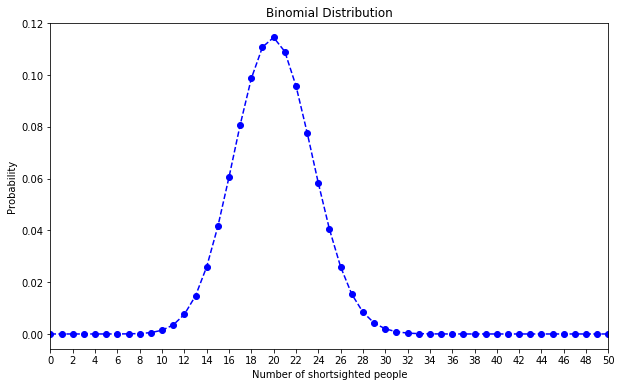

In [8]:
plot_binom(N=50, p=0.4, title='Number of shortsighted people')

With a myopia probability of 40%, there is almost a zero percent chance of having less than 8 and more than 32 shortsighted people in our 50-people group. And as expected, the maximum of probability is reached with 20 people, which is the expected value.

SPOILER ALERT: you may have recognized the bell-shaped curve, aka the normal distribution. But that's another story :)

### 2.2.5. Example: ARDS. Credits to [this site](https://rarediseases.org/rare-diseases/acute-respiratory-distress-syndrome/).
Acute respiratory distress syndrome (ARDS) is a type of severe, acute lung dysfunction affecting all or most of both lungs that occurs as a result of illness or injury. It is a rare disease that affects 16 individuals per 100,000 persons aged 15-19. Therefore $p=1.6\times10^{-5}$ in this age category, which is VERY low.

Let's plot the same graph as above, with a group of 10 people:

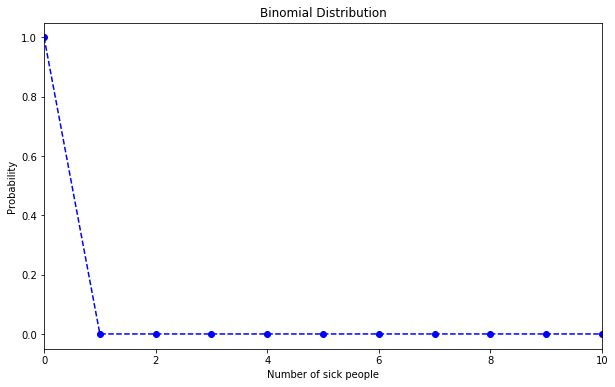

In [9]:
plot_binom(N=10, p=1.6e-5, title='Number of sick people')

This result was expected. With such a low probability of occurence and with only 10 people, it's normal that there's is almost 100% chance that nobody will be sick in our group. But even with a group of 20,000 people, we would find the same distribution, because of this so low a value of $p$.

Also, note how the distribution does not look like a normal distribution anymore. So you've got to be careful when approximating distributions with a normal distribution, it does not necessarily work!

# 3. Poisson's distribution
The Poisson distribution is actually an approximation of the binomial distribution. It is used when the probability $p$ is very low, together with a large number of experiments $N$. So typically, the Poisson distribution is used in the case of rare events (rare diseases, frauds, etc.)

> **If $p<<1$ and $N>>1$, then $X$ follows a Poisson distribution with parameter $\lambda=Np$, with the following properties:**
>
>- **Notation: $X\sim\mathcal{P}(\lambda)$, with $\lambda=Np$**.
>- **Probability: $P_m^N(X=1)=\dfrac{\lambda^m}{m!}\ \exp(-\lambda)$**.
>- **Theoretical expected value: $E(X)=Np=\lambda$**.
>- **Theoretical variance: $V(X)=Npq=Np(1-p)=Np=\lambda$, because $p$ is very small so that $1-p\approx 1$**.

The ARDS example above is a perfect illustration of the Poisson distribution. Let's plot this distribution together with the binomial distribution.

In [10]:
from math import exp

# This function calculates the probability of having m times X=1, out of N experiments
def prob_poisson(N, m, p):
    return (N*p)**m/fact(m)*exp(-N*p)

In [11]:
def plot_poisson(N, p):
    # Calculate and store all probabilities
    probs_b = []
    probs_p = []

    for m in range(0,N+1):
        probs_b.append(prob_binom(N=N, m=m, p=p))
        probs_p.append(prob_poisson(N=N, m=m, p=p))

    # Plot
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.plot(probs_b, 'bo', label='Binomial')
    ax.plot(probs_p, '-', label='Poisson')
    ax.set_title('Binomial & Poisson Distributions')
    ax.set_xticks(np.arange(0,N+1,2))
    ax.set_xlim(0,N)
    ax.set_xlabel('Number of sick people')
    ax.set_ylabel('Probability')
    ax.legend()

    plt.show()

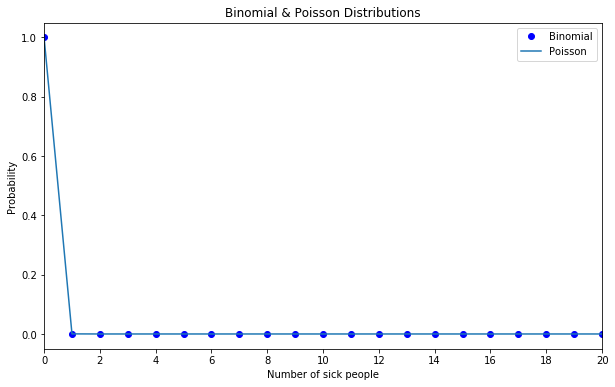

In [12]:
plot_poisson(N=20, p=1.6e-5)

See how the Poisson distribution perfectly matches the binomial distribution. 

Let's try with another (less brutal) example: $N=20, p=0.01$.

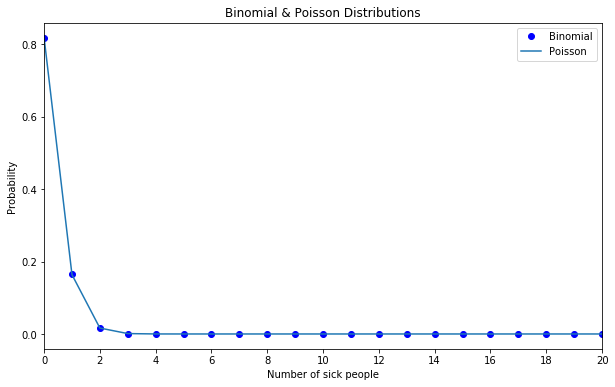

In [13]:
plot_poisson(N=20, p=0.01)

Another perfect match!

Let's try an example where it doesn't work that well: $N=20$ and $p=0.1$.

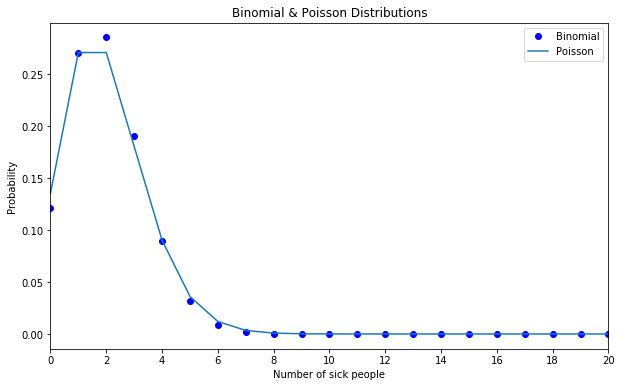

In [14]:
plot_poisson(N=20, p=0.1)

See how in this case we are straying away from the exact binomial distribution because $p$ is a bit too large for the Poisson approximation.

Finally, you may ask yourself why use the Poisson formula instead of the binomial one, all the more so since it's an approximation, so we might as well use the exact one. Well the Poisson formula is a bit easier to handle because it does not involve any combinatorial calculation. So if you were to calculate these probabilities "by hand", it might be easier to use the Poisson expression instead of the binomial one.

# Appendix: Probability formula of the binomial distribution
Let's consider the tossing of an **unfair coin** that has a probability $p=0.6$ and $q=0.4$ of obtaining heads and tails, respectively. Let $X$ be the random variable associated to the result of the toss. It is clear that $X$ follows a binomial distribution, because it has only two possible realizations.

Imagine we are tossing it $N=10$ times and we wish to calculate the probability of obtaining four heads and six tails, **in this order**: `H H H H T T T T T T`. Since the throws are all independent, the probability of this configuration is the product of the probabilities of each throw $T_i$:

$$P \left( \bigcap_{i=1}^{10} T_i \right) = \prod_{i=1}^{10} P(T_i)$$

The above equation is the condensed form of:

$$ P(H\cap H \cap H \cap H \cap T \cap T \cap T \cap T \cap T \cap T) 
   = P(H)\times P(H)\times P(H)\times P(H)\times P(T)\times P(T)\times P(T)\times P(T)\times P(T)\times P(T)$$
   
so that the probability of obtaining `HHHHTTTTTT` is $P(H)^4\times P(T)^6 = p^4\times q^6$.

This can now be generalized to $N$ throws, instead of only 10. 

**With $N$ coin tosses, the probability of obtaining exactly $m$ heads and $N-m$ tails, in this order, is : $p^m\times q^{N-m}$.**

This can be even more generalized to an experiment other than a coin toss:

> **If $X\sim\mathcal{B}(N,p)$, the probability of obtaining exactly $m$ times $X=1$ and $N-m$ times $X=0$, in this order, is $p^m\times q^{N-m}$.**

We're almost there! There's only one thing left to do to arrive at the probability formula of the binomial distribution. We now have the probability of obtaining exactly $m$ times $X=1$ and $N-m$ times $X=0$, in this order. But we don't necessarily want this specific order right? When we're interested in the probability of having exactly 4 heads and 6 tails, it could be `HHHHTTTTTT` or `HTHHTTHTTT` or `TTHTHHTHTT`, etc.

So the probability that we calculated above $(p^4\times q^6)$ corresponds to the very particular configuration `HHHHTTTTTT`. Therefore, in order to have to probability of having all possible combinations of 4 heads and 6 tails, we need to multiply this single probability by the total number of possible combinations. And this is actually a combinatorial problem: we have 10 slots, how many possible ways are there to arrange 4 heads and 6 tails in these slots? That's $\begin{pmatrix}10\\4\end{pmatrix}$.

This can be generalized: we have $N$ slots, how many possible ways are there to arrange $m$ times $X=1$ and $N-m$ times $X=0$ in these slots? That's $\begin{pmatrix}N\\m\end{pmatrix}$.

> **If $X\sim\mathcal{B}(N,p)$, the probability of obtaining exactly $m$ times $X=1$ and $N-m$ times $X=0$ is $\begin{pmatrix}N\\m\end{pmatrix}\times p^m\times q^{N-m}$.**

# Appendix: Probability formula of the Poisson distribution
The proof of the probability formula of the Poisson distribution starts with the binomial distribution formula:

$$ P_m^N(X=1) = \begin{pmatrix} N \\ m \end{pmatrix} p^m q^{N-m} = \frac{N!}{m!(N-m)!}p^mq^{N-m}  = \frac{N!}{m!(N-m)!}p^m(1-p)^{N-m} $$

First we are going to remove several terms thanks to the factorials. Indeed we have:

$$ \frac{N!}{m!(N-m)!} = \frac{N(N-1)\ldots (N-m+1)(N-m)(N-m-1)\ldots\times3\times 2\times 1}{m!(N-m)(N-m-1)\ldots\times 3\times 2\times 1} $$

Notice how we have plenty of terms in common in the numerator and the denominator, so that it reduces to:

$$ \frac{N!}{m!(N-m)!} = \frac{N(N-1)\ldots (N-m+1)}{m!} $$

Then we are going to factorize $N$ in the numerator. This gives:

$$ \frac{N(N-1)\ldots (N-m+2)(N-m+1)}{m!} = \frac{N\times N\left(1-\dfrac{1}{N}\right)\times N\left(1-\dfrac{2}{N}\right) \ldots\times N\left(1-\dfrac{m-2}{N}\right)\times N\left(1-\dfrac{m-1}{N}\right)}{m!}$$

Now we need to remember that the Poisson distribution is an approximation of the binomial distribution when $N$ is large, so that all terms that have the form $\dfrac{\ldots}{N}$ will be very close to zero. The fraction then becomes:

$$ \frac{N(N-1)\ldots (N-m+2)(N-m+1)}{m!} = \frac{\overbrace{N\times N\times N\ldots\times N\times N}^{m~\rm times}}{m!} = \frac{N^m}{m!}$$

The probability becomes:

$$ P_m^N(X=1) = \frac{N^m}{m!} p^m(1-p)^{N-m} $$

One error here would be to use the fact that the Poisson distribution assumes $p<<1$, so that $1-p\approx p$ and:

$$ P_m^N(X=1) = \frac{N^m}{m!} p^m(1-p)^{N-m} \approx \frac{N^m}{m!} p^m = \frac{(Np)^m}{m!}$$

This approximation, however, is a bit too brutal. When we do this, the resulting probability formula does not fit well the cases where $p$ is small and $N$ is large. Therefore, we need to be a bit more subtle:

$$ P_m^N(X=1) = \frac{N^m}{m!} p^m(1-p)^{N-m} = \frac{N^m}{m!} p^m(1-p)^{N}(1-p)^{-m} 
              = \frac{N^m}{m!(1-p)^m} p^m(1-p)^{N}$$
              
The trick now is to perform the brutal approximation on $(1-p)^m$ and the subtle approximation on $(1-p)^N$. You can see it as a middle ground between either brutally removing both terms and subtly approximating them.

So let's start by brutally removing $(1-p)^m$:

$$ P_m^N(X=1) = \frac{N^m}{m!} p^m(1-p)^{N}$$

And now for the subtle part. What we need is the Taylor expansion of the exponential function. When $x$ is very close to zero, we can write the exponential function as:

$$ e^x \approx 1+x$$

Replacing $x$ by $-x$ gives:

$$ e^{-x} \approx (1-x)$$

so that:

$$ (1-p)^N \approx \left( e^{-p} \right)^N \approx e^{-Np} $$

Let's reinject this in our probability formula, and we get:

$$ P_m^N(X=1) = \frac{N^m}{m!} p^m e^{-Np} = \frac{Np^{m}}{m!} e^{-Np}$$

Finally, we define $\lambda=Np$ and we get:

$$ P_m^N(X=1) = \frac{\lambda^{m}}{m!} e^{-\lambda}$$